<a href="https://colab.research.google.com/github/smybilginn/digital_image_processing/blob/main/1_spatial_and_histogram_image_enhancement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, exposure

- cv2 → OpenCV, görüntü işleme

- numpy → matematiksel işlemler

- matplotlib.pyplot → görselleştirme

- skimage.exposure → histogram eşleme ve bazı özel dönüşümler

- cv2 → temel işlemler, hızlı okuma/yazma

- skimage → histogram tabanlı, istatistik tabanlı veya gelişmiş dönüşümler

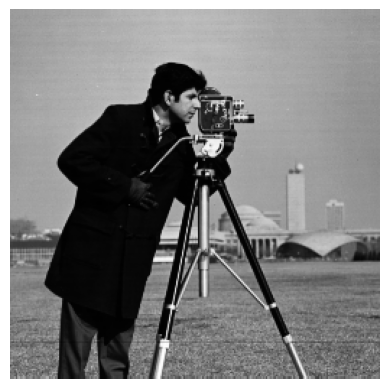

In [ ]:
import matplotlib.pyplot as plt
from skimage import io

url = "https://raw.githubusercontent.com/antimatter15/cameraman/master/cameraman.png"
img = io.imread(url)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


#**1 SPATIAL DOMAIN İŞLEMLERİ**


##ADIM 1: Brightness (parlaklık) artırma/azaltma
- Görüntünün tüm piksel değerlerini sabit bir sayı kadar artırmak veya azaltmak

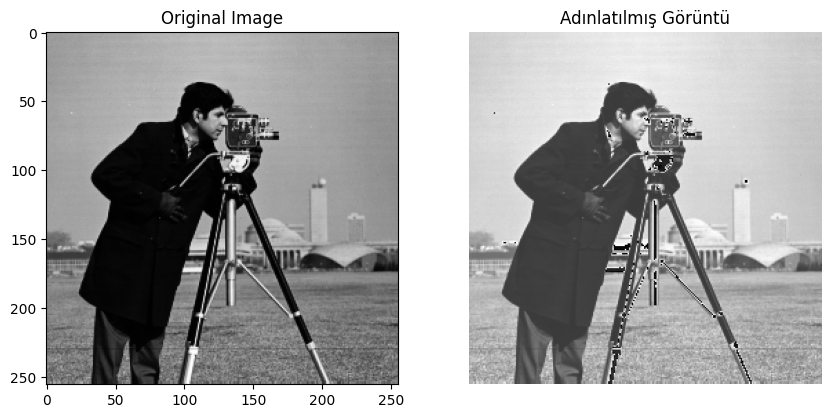

In [ ]:
#Brightness artırma
bright_img = np.clip(img + 50, 0, 255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(bright_img, cmap='gray')
plt.title('Adınlatılmış Görüntü')
plt.axis('off')

plt.show()

**Brightness artırırken np.clip kullanılır; çünkü piksel değerlerinin 0–255 sınırını aşmasını engeller.**

##ADIM 2: Contrast Stretching (Kontrast Germe)
- Kontrast: Görüntüde açık ve koyu alanlar arasındaki fark
- Düşük kontrast: Piksel değerleri dar bir aralıkta (ör. 100–150)
- Contrast Stretching: Bu aralığı 0–255 gibi tam piksel değer aralığına yaymak

**Etki**: Görüntü daha net ve canlı görünür

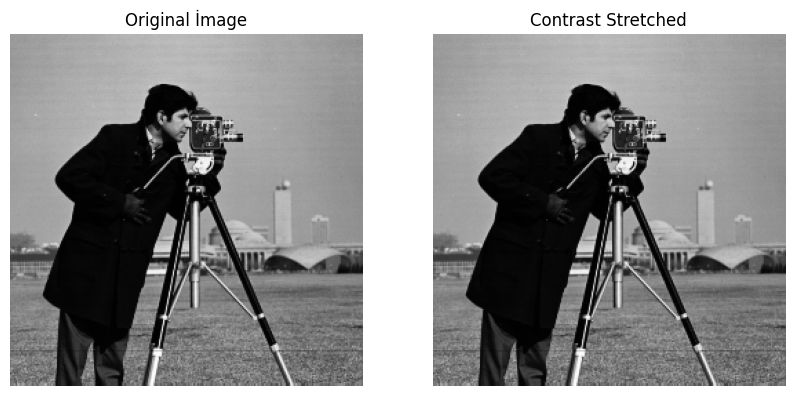

In [ ]:
#Min ve Max değerleri bul
min_val = np.min(img)
max_val = np.max(img)

#Lineer kontrast germe
contrast_img = ((img - min_val) / (max_val - min_val) * 255).astype(np.uint8)

plt. figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Original İmage")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(contrast_img, cmap='gray') # Değişiklik burada yapıldı: contrast_img -> contrast__img
plt.title("Contrast Stretched")
plt.axis('off')
plt.show()

| İşlem               | Ne yapar?                                                        | Önemli Not                                   |
| ------------------- | ---------------------------------------------------------------- | -------------------------------------------- |
| Brightness          | Tüm piksel değerlerini **+/- sabit miktar** değiştirir           | 0–255 dışı değerler `np.clip` ile sabitlenir |
| Contrast Stretching | Piksel değerlerini **dar bir aralıktan geniş bir aralığa** yayar | Görüntü daha canlı ve net görünür            |


##ADIM 3: Gamma (Power-law) Dönüşümleri

Ama.: Görüntünün parlaklık algısını insan gözüne göre ayarlamak.

- Gamma < 1 ise görüntü aydınlanır
- Gamma > 1 ise görüntü kararır.

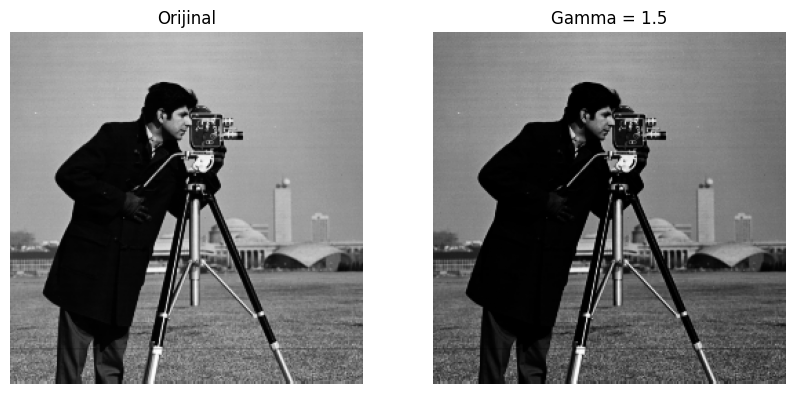

In [ ]:
# Piksel değerlerini 0-1 aralığına normalize et
img_norm = img / 255.0

gamma = 1.5  # >1 daha koyu bir görüntü
gamma_img = np.power(img_norm, gamma) * 255
gamma_img = gamma_img.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(gamma_img, cmap='gray')
plt.title(f"Gamma = {gamma}")
plt.axis('off')
plt.show()


**Gamma < 1: Aydınlatma**
- Piksel değerlerini 0-1 aralığında normalize ediyoruz.
- 0 ile 1 arasındaki sayıların 1'den küçük bir üsse (gamma < 1) yükseltilmesi -> değerler büyür
- Sonuç: Görüntü aydınlanır

**Gamma > 1: Karartma**
- 0-1 aralığında sayıların 1'den büyük bir üsse (gamma > 1) yükseltilmesi -> değerler küçülür
- Sonuç: Görüntü kararır


##ADIM 4: Sigmoid Function ile Contrast Stretching

- Sigmoid fonksiyon S şeklinde bir eğridir.
- Orta tonları vurgular, çok koyu ve çok açık pikselleri fazla bozmaz.
- Görüntüde kontrastı artırmak için kullanılır.

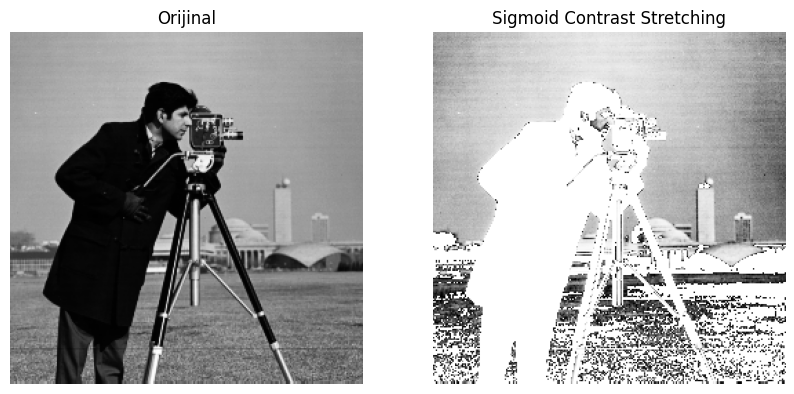

In [ ]:
# Parametreler
f0 = 128  # S eğrisinin ortası
a = 0.05  # diklik kontrolü

# Sigmoid dönüşüm
sigmoid_img = 255 / (1 + np.exp(-a*(img - f0)))
sigmoid_img = sigmoid_img.astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sigmoid_img, cmap='gray')
plt.title("Sigmoid Contrast Stretching")
plt.axis('off')
plt.show()


- f0 → Sigmoid eğrisinin orta noktası. Genellikle 0–255 aralığında bir piksel değeri seçilir.
- f0 = 128 demek, orta gri değerdeki piksellerin sigmoid eğrisinin tam ortasında olacağı anlamına geliyor.
- a → Sigmoid eğrisinin dikliği.
  - Küçük a → eğri daha yassı → kontrast az
  - Büyük a → eğri daha dik → kontrast artar

Nasıl Çalışır:
- img - f0 → piksel değerini orta noktaya göre kaydırıyor.
- -a*(img - f0) → dikliği ve yönü ayarlıyor.
- np.exp(...) → üssel fonksiyon ile S eğrisi oluşturuyor.
- 255 / (...) → sonucu 0–255 aralığına geri getiriyor.
- astype(np.uint8) → görüntüyü tekrar 8-bit tam sayıya çeviriyor.

Bu yöntem, orta tonları daha kontrastlı, çok parlak veya çok koyu bölgeleri ise daha az değiştirir. Yani bir “S eğrisi” kontrast efekti yaratır.

| İşlem                       | Etki                                                              | Not                                                             |
| --------------------------- | ----------------------------------------------------------------- | --------------------------------------------------------------- |
| Brightness                  | Tüm piksel değerleri +/− sabit miktarda değişir                   | Orta, açık ve koyu tonlar aynı oranda etkilenir                 |
| Linear Contrast Stretching  | Piksel değerlerini dar aralıktan geniş aralığa yayar              | Orta tonlar dahil tüm tonlar eşit şekilde değişir               |
| Sigmoid Contrast Stretching | Orta tonları vurgular, çok açık ve koyu tonları fazla değiştirmez | Tıbbi görüntüler veya istediğimiz bölgeye odaklanmak için ideal |


#**2 HİSTOGRAM İŞLEMLERİ**

##ADIM 5: Histogram Görüntüleme ve Equalization



**Histogram Nedir?**
- Görüntüdeki piksel değerlerinin dağılımı
- Yatay eksen piksel değeri (0-255)
- Dikey eksen, o piksel değerine sahip piksel sayısı

**Mantığı**
- Düşük kontrastlı görüntü -> histogram dar aralıkta yoğunlaşır
- Yüksek kontrastlı görüntü -> histogram tüm aralığa yayılır

##Histogram Gösterme

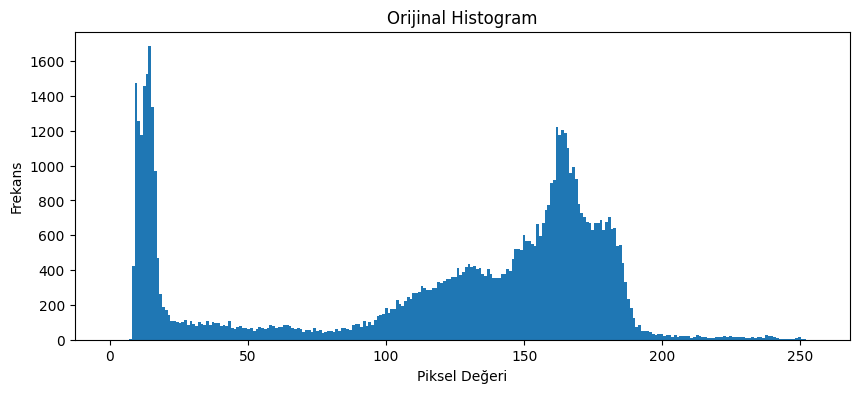

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(img.ravel(), bins=256, range=(0,255))
plt.title("Orijinal Histogram")
plt.xlabel("Piksel Değeri")
plt.ylabel("Frekans")
plt.show()


img.ravel() -> Görüntüyü 1 boyutlu diziye çevirir.

bins=256 -> 0-255 değerleri için 256 kutu

##Histogram Equalization

- Amaç: Görüntü kontrastını artırmak, histogramını düzleştirmek



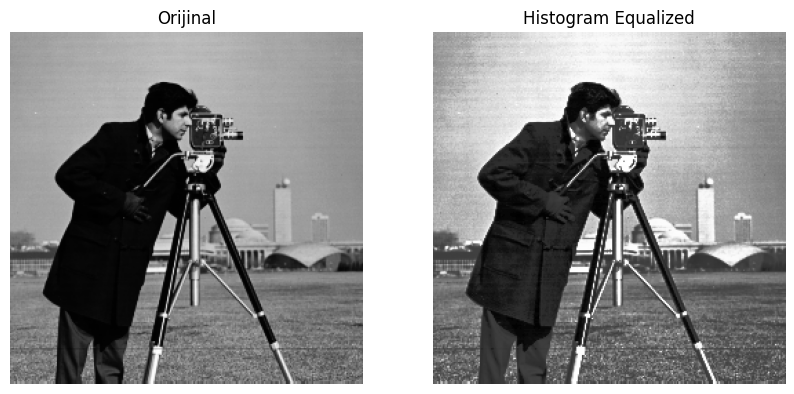

In [ ]:
equalized_img = cv2.equalizeHist(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title("Histogram Equalized")
plt.axis('off')
plt.show()


| İşlem | Ne yapar? | Farkı / Önemli Not |
|-------|-----------|------------------|
| Histogram Equalization | Piksel değerlerini 0–255 aralığında yayar ve daha eşit dağıtır | Düşük kontrastlı detaylar görünür hale gelir; piksel yoğunluğuna göre dönüşüm yapar |
| Brightness / Contrast Stretching | Tüm piksel değerlerini +/− sabit veya lineer olarak değiştirir | Global dönüşüm uygular; tüm piksel değerleri aynı mantıkla değişir |


##ADIM 6: Histogram Matching (Histogram Eşleme)
- Amaç: Bir görüntünün histogramını başka bir görüntünün histogramına benzetmek



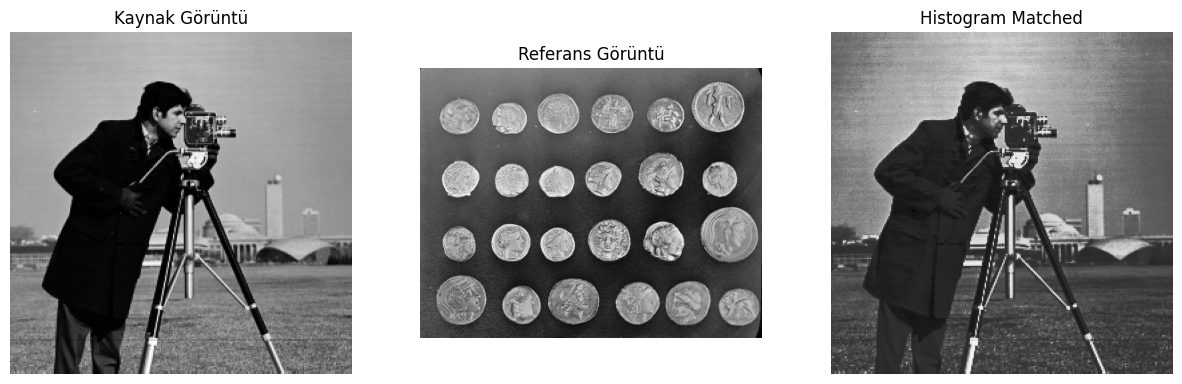

In [ ]:
from skimage import data


# Kaynak görüntü: bizim cameraman
source = img

# Referans görüntü: farklı bir test resmi
reference = data.coins()  # skimage’nin hazır bir siyah-beyaz resmi

# Histogram Matching
matched = exposure.match_histograms(source, reference)

# Göster
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(source, cmap='gray')
plt.title("Kaynak Görüntü")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(reference, cmap='gray')
plt.title("Referans Görüntü")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(matched, cmap='gray')
plt.title("Histogram Matched")
plt.axis('off')
plt.show()

| İşlem                  | Ne yapar?                                                                 | Fark / Önemli Not                                                   |
| ---------------------- | ------------------------------------------------------------------------- | ------------------------------------------------------------------- |
| Histogram Equalization | Görüntüdeki piksel yoğunluklarını eşitler, düşük kontrastlı alanları açar | Sadece **kendi görüntüsü** ile ilgilenir, referans gerekmez         |
| Histogram Matching     | Kaynak görüntüyü bir **referans görüntünün histogramına** benzetir        | İki görüntü arasında **uyum** sağlar, referans histogram kullanılır |


##ADIM 7: Local Histogram Processing (Yerel Histogram Eşleme)

- Histogram equalization global bir işlemdir. Tüm görüntüye aynı dönüşümü uygular.
- Bazı durumlarda görüntünün farklı bölgeleri farklı kontrastlara sahip olabilir.
- Çözüm: Görüntüyü küçük bloklara bölmek ve her blok için ayrı histogram equalization yapmak.
- Etki: Her bölge kendi detaylarını korur ve lokal kontrast artar

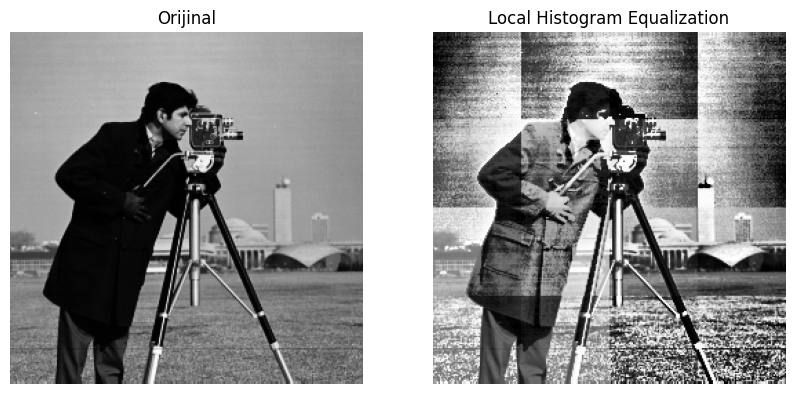

In [ ]:
# Parametre: pencere boyutu
window_size = 64

# Kopya görüntü
local_img = img.copy()

# Görüntüyü bloklara ayır ve her blokta histogram equalization uygula
for i in range(0, img.shape[0], window_size):
    for j in range(0, img.shape[1], window_size):
        block = img[i:i+window_size, j:j+window_size]
        local_img[i:i+window_size, j:j+window_size] = cv2.equalizeHist(block)

# Görselleştir
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(local_img, cmap='gray')
plt.title("Local Histogram Equalization")
plt.axis('off')
plt.show()


| İşlem                         | Ne yapar?                                                     | Avantajı                                                   |
| ----------------------------- | ------------------------------------------------------------- | ---------------------------------------------------------- |
| Global Histogram Equalization | Tüm görüntüye aynı dönüşümü uygular                           | Basit ama lokal detayları bazen yeterince açmaz            |
| Local Histogram Processing    | Görüntüyü bloklara ayırıp her blokta histogram eşlemesi yapar | İlgi alanındaki detayları korur ve lokal kontrastı artırır |


##ADIM 8: Using Histogram Statistics for Image Enhancement

(Histogram istatistikleri ile görüntü iyileştirme)

Histogramdan sadece şekil değil, sayısal bilgiler (istatistikler) de çıkarabiliriz:
- Ortalama (mean) : Görüntünün genel parlaklığı
- Standart Sapma (std): Kontrastın bir ölçüsü

Bu istatistiklere bakarak:
- Görüntü çok mu karanlık
- Kontrastı düşük mü?

karar verip uygun bir iyileştirme yapabiliriz.

In [ ]:
mean_val = np.mean(img)
std_val = np.std(img)

print("Ortalama:", mean_val)
print("Standart Sapma:", std_val)


Ortalama: 118.7244873046875
Standart Sapma: 62.34123968732711


Ortalama (mean) Ne söylüyor?
- Piksel parlaklığı 0-255
- Orta nokta 128

Bizim çıktımız:
- 118.7 < 128
- Görüntü hafif karanlığa yakın ama çok karanlık değil.

Standart Sapma Ne Söylüyor?
- Düşük std (yaklaşık 10-30): düşük kontrast, soluk görüntü
- Orta std (yaklaşık 40-60): normal kontrast
- Yüksek std (yaklaşık 70+): yüksek kontrast

Bizim çıktımız:
- 62.3: iyi/yeterli kontrast
- Görüntü detay içeriyor
- Kontrast zayıf değil

In [ ]:
enhanced_img = np.clip(img + (128 - mean_val), 0, 255).astype(np.uint8)


Ortalama düşük olduğu için paralklık artırma işlemi yapıldı.

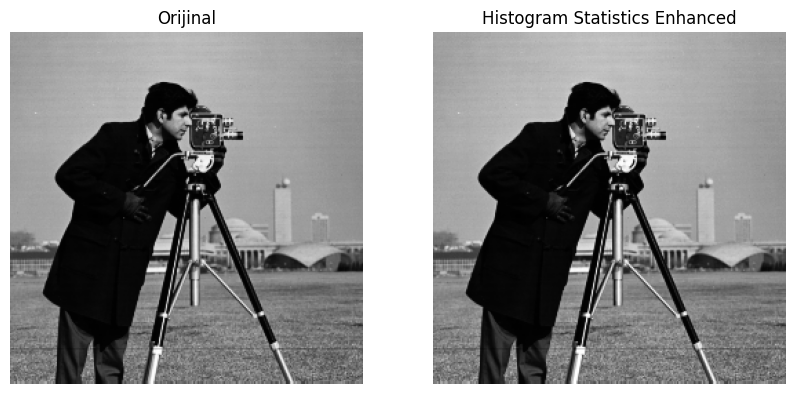

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(enhanced_img, cmap='gray')
plt.title("Histogram Statistics Enhanced")
plt.axis('off')
plt.show()
